**Outline:**

- [Part I](#parti): EDA and Visualizations
- [Part II](#partii): t-SNE (need to explore more here)
- [Part III](#partiii): PCA (a bit of a mess)
- [Part IV](#partiv): Modeling (to be completed)
- [Part V](#partv): Scoring (to be completed)
- [Part VI](#partvi): Recommendations (to be completed)

---

<a id="parti"></a>
# Part I: EDA


### 1. Load packages and data

In [390]:
import pandas as pd
import numpy as np
from IPython.display import display

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from collections import Counter
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

# Dataset from Kaggle (not the full dataset from UCI Irvine repo)
hua = pd.read_csv("kaggle/train.csv")
hua_tr = hua.drop(['subject', 'Activity'], axis=1)
hua_labels = hua.Activity

hua_test = pd.read_csv("kaggle/test.csv")
hua_ts_labels = hua_test.Activity
hua_ts = hua_test.drop(['subject', 'Activity'], axis=1)

hua_tr.sample(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
4305,0.264092,-0.023504,-0.107676,-0.234282,0.196370,-0.086402,-0.258091,0.200500,-0.090240,-0.198316,...,0.282231,0.031833,-0.290001,0.231141,-0.750424,0.297139,0.025548,-0.593255,0.333031,0.172422
1916,0.282743,-0.013752,-0.118252,-0.998267,-0.954082,-0.990955,-0.998627,-0.954306,-0.989683,-0.941882,...,0.495184,-0.612376,-0.809354,-0.043304,-0.199913,0.316284,0.202678,-0.793928,0.191985,-0.093716
98,0.284317,-0.027206,-0.212303,-0.183444,0.141076,-0.225689,-0.249080,0.110614,-0.221009,0.032522,...,0.293699,-0.241333,-0.551872,-0.053158,0.512810,-0.811518,0.581624,-0.764185,0.260565,0.031442


In [283]:
hua_train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [285]:
hua_labels.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [65]:
hua_test.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING


In [441]:
hua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [177]:
hua.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.489547,0.058593,-0.056515,17.413085,0.191376,0.174918,0.186888,0.166757,0.134113,0.145947
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.511807,0.297480,0.279122,8.975143,0.393411,0.379923,0.389848,0.372784,0.340797,0.353077
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.812065,-0.017885,-0.143414,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.709417,0.182071,0.003181,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.509079,0.248353,0.107659,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,1.000000,0.478157,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [439]:
pd.options.display.max_columns = None
display(hua)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [151]:
hua.groupby(hua.Activity).count()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,...,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407
SITTING,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,...,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286
STANDING,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,...,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374
WALKING,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,...,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226
WALKING_DOWNSTAIRS,986,986,986,986,986,986,986,986,986,986,...,986,986,986,986,986,986,986,986,986,986
WALKING_UPSTAIRS,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,...,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073


In [153]:
hua_test.groupby(hua.Activity).count()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,516,516,516,516,516,516,516,516,516,516,...,516,516,516,516,516,516,516,516,516,516
SITTING,489,489,489,489,489,489,489,489,489,489,...,489,489,489,489,489,489,489,489,489,489
STANDING,530,530,530,530,530,530,530,530,530,530,...,530,530,530,530,530,530,530,530,530,530
WALKING,543,543,543,543,543,543,543,543,543,543,...,543,543,543,543,543,543,543,543,543,543
WALKING_DOWNSTAIRS,411,411,411,411,411,411,411,411,411,411,...,411,411,411,411,411,411,411,411,411,411
WALKING_UPSTAIRS,458,458,458,458,458,458,458,458,458,458,...,458,458,458,458,458,458,458,458,458,458


In [154]:
# Any null values?
hua.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [156]:
# Dummy Labels on the activities
label_dummies = pd.get_dummies(hua.Activity)

In [432]:
hua.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,0.179941,-0.058627,1,STANDING,0,0,1,0,0,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.180289,-0.054317,1,STANDING,0,0,1,0,0,0


In [438]:
print (hua.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'],
      dtype='object', length=569)


In [431]:
# Merge this with the hua dataset 
hua = pd.concat([hua, label_dummies], axis=1) # <—— Run once!
hua.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
2003,0.251307,-0.017980,-0.109894,-0.486097,-0.163908,-0.553810,-0.541943,-0.160087,-0.530883,-0.206873,...,0.228891,-0.103107,11,WALKING,0,0,0,1,0,0
6349,0.333155,-0.005573,-0.126780,-0.964486,-0.957871,-0.953019,-0.968313,-0.960831,-0.955353,-0.890695,...,-0.323823,-0.666871,28,LAYING,1,0,0,0,0,0


### Let's see what the dfifferent types of signals there are
* This strips out the X, Y, Z, mean, med std, etc from the features and buckets them into categories

In [297]:
# Group and count main names of columns to see how much of each measurement type we have
types = pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in hua.columns]), 
                       orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)
types

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
WALKING               1226
SITTING               1286
STANDING              1374
LAYING                1407
Name: Activity, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

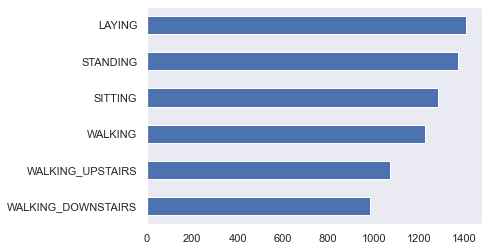

In [24]:
# How evenly distributed are the activities?
label_counts = hua.Activity.value_counts().sort_values(ascending=True)
print (label_counts)

# What's this look like?
label_counts.plot.barh()
plt.show

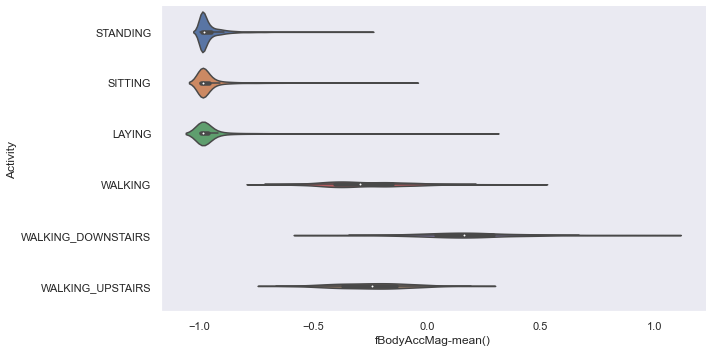

In [185]:
sns.set_color_codes("muted")
sns.catplot(y='Activity', x='fBodyAccMag-mean()', data=hua, kind="violin", height=5, aspect=2)

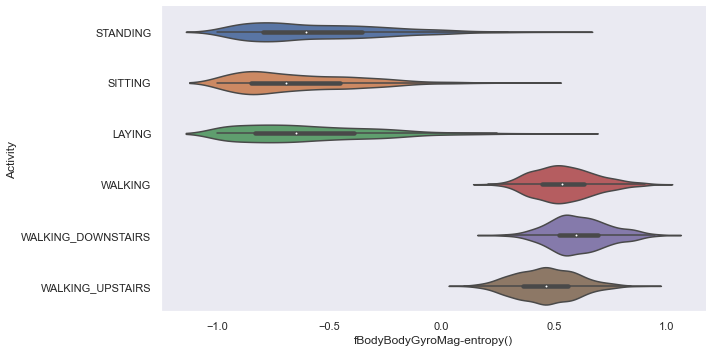

In [186]:
sns.set_color_codes("muted")
sns.catplot(y='Activity', x='fBodyBodyGyroMag-entropy()', data=hua, kind="violin", height=5, aspect=2)

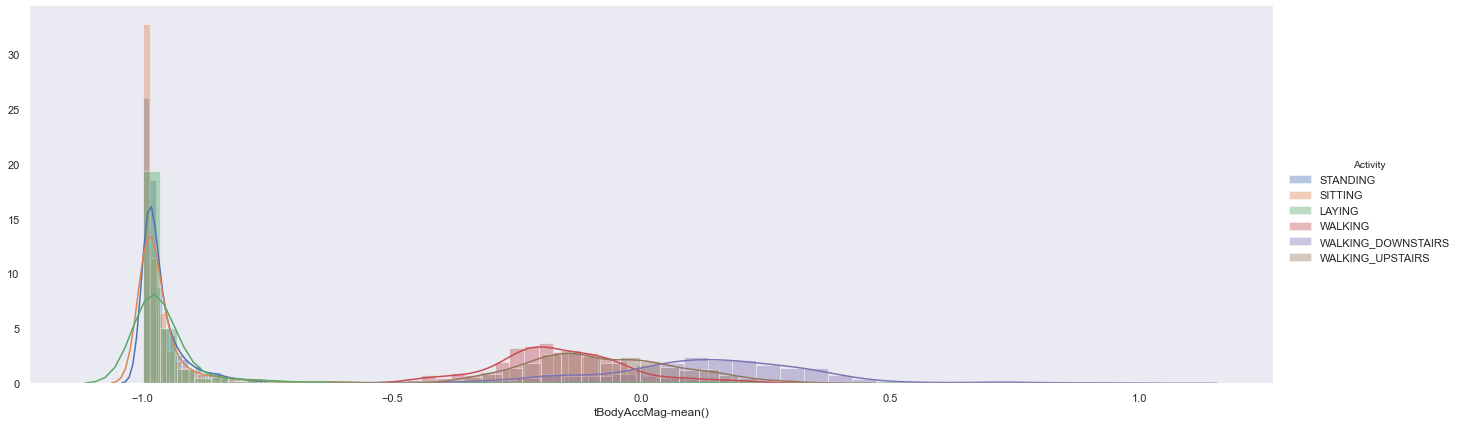

In [188]:
facetgrid = sns.FacetGrid(hua, hue='Activity', height=6,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=True).add_legend()

In [189]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(hua, row='tBodyAccMag-mean()', hue='Activity', aspect=15, height=.5, palette=pal)

ValueError: Image size of 540x264600 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 540x264600 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 540x264600 with 7350 Axes>

### Can we see what the different activities look like per subject?
* plot out the signals from select features 
* how do they compare?

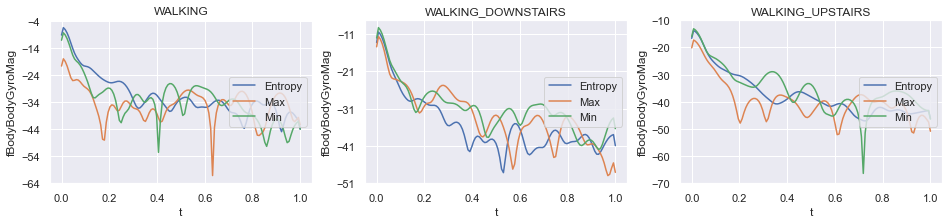

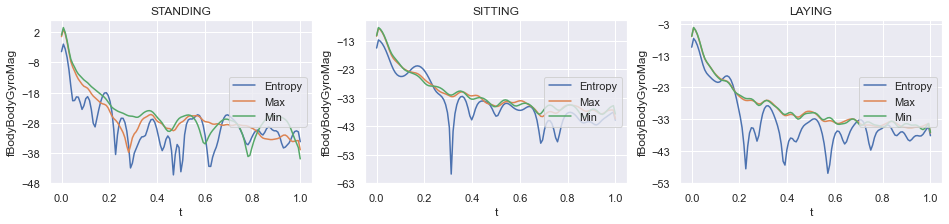

In [19]:
# NOTE TO SELF: Make functions and loops for this to scale it

# Select the subject and the activity
t_series_walk = hua.loc[(hua['subject'] == 19) & (hua['Activity'] == 'WALKING')] #
t_series_stand = hua.loc[(hua['subject'] == 19) & (hua['Activity'] == 'STANDING')]
t_series_walkup = hua.loc[(hua['subject'] == 19) & (hua['Activity'] == 'WALKING_UPSTAIRS')]

t_series_lay = hua.loc[(hua['subject'] == 5) & (hua['Activity'] == 'LAYING')]
t_series_sit = hua.loc[(hua['subject'] == 5) & (hua['Activity'] == 'SITTING')]
t_series_walkdn = hua.loc[(hua['subject'] == 5) & (hua['Activity'] == 'WALKING_DOWNSTAIRS')]


# Pick the signals to plot
w1 = t_series_walk['fBodyBodyGyroMag-entropy()']
w2 = t_series_walk['fBodyBodyGyroMag-max()']
w3 = t_series_walk['fBodyBodyGyroMag-min()']

wu1 = t_series_walkup['fBodyBodyGyroMag-entropy()']
wu2 = t_series_walkup['fBodyBodyGyroMag-max()']
wu3 = t_series_walkup['fBodyBodyGyroMag-min()']

wd1 = t_series_walkdn['fBodyBodyGyroMag-entropy()']
wd2 = t_series_walkdn['fBodyBodyGyroMag-max()']
wd3 = t_series_walkdn['fBodyBodyGyroMag-min()']

s1 = t_series_stand['fBodyBodyGyroMag-entropy()']
s2 = t_series_stand['fBodyBodyGyroMag-max()']
s3 = t_series_stand['fBodyBodyGyroMag-min()']

st1 = t_series_sit['fBodyBodyGyroMag-entropy()']
st2 = t_series_sit['fBodyBodyGyroMag-max()']
st3 = t_series_sit['fBodyBodyGyroMag-min()']

l1 = t_series_lay['fBodyBodyGyroMag-entropy()']
l2 = t_series_lay['fBodyBodyGyroMag-max()']
l3 = t_series_lay['fBodyBodyGyroMag-min()']

# Create the plots

fig, (ax1, ax4, ax3) = plt.subplots(1, 3, figsize=(16, 3))

ax1.set_title('WALKING')
ax1.psd(w1, label='Entropy')
ax1.psd(w2, label='Max')
ax1.psd(w3, label='Min')
ax1.legend(loc='right')
ax1.set_xlabel('t')
ax1.set_ylabel('fBodyBodyGyroMag')
ax1.grid(True)

ax4.set_title('WALKING_DOWNSTAIRS')
ax4.psd(wd1, label='Entropy')
ax4.psd(wd2, label='Max')
ax4.psd(wd3, label='Min')
ax4.legend(loc='right')
ax4.set_xlabel('t')
ax4.set_ylabel('fBodyBodyGyroMag')
ax4.grid(True)

ax3.set_title('WALKING_UPSTAIRS')
ax3.psd(wu1, label='Entropy')
ax3.psd(wu2, label='Max')
ax3.psd(wu3, label='Min')
ax3.legend(loc='right')
ax3.set_xlabel('t')
ax3.set_ylabel('fBodyBodyGyroMag')
ax3.grid(True)

fig, (ax2, ax5, ax6) = plt.subplots(1, 3, figsize=(16, 3))

ax2.set_title('STANDING')
ax2.psd(s1, label='Entropy')
ax2.psd(s2, label='Max')
ax2.psd(s3, label='Min')
ax2.legend(loc='right')
ax2.set_xlabel('t')
ax2.set_ylabel('fBodyBodyGyroMag')
ax2.grid(True)

ax5.set_title('SITTING')
ax5.psd(st1, label='Entropy')
ax5.psd(st2, label='Max')
ax5.psd(st3, label='Min')
ax5.legend(loc='right')
ax5.set_xlabel('t')
ax5.set_ylabel('fBodyBodyGyroMag')
ax5.grid(True)

ax6.set_title('LAYING')
ax6.psd(l1, label='Entropy')
ax6.psd(l2, label='Max')
ax6.psd(l3, label='Min')
ax6.legend(loc='right')
ax6.set_xlabel('t')
ax6.set_ylabel('fBodyBodyGyroMag')
ax6.grid(True)

plt.show()


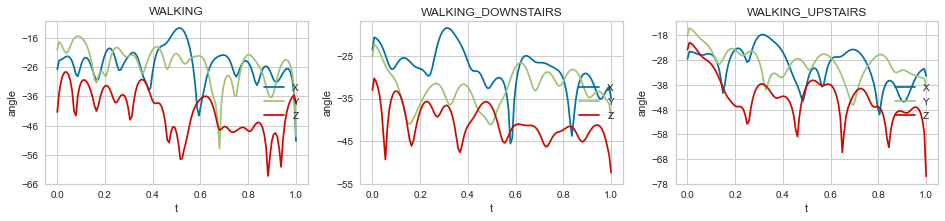

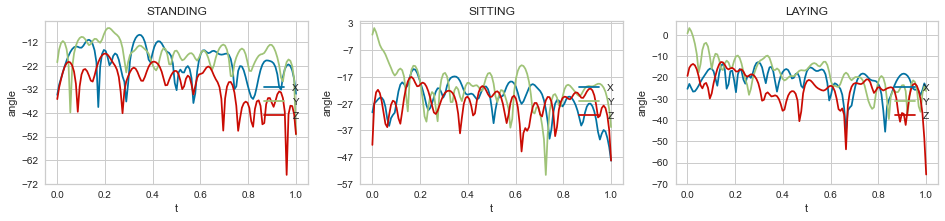

In [298]:
# NOTE TO SELF: Make functions and loops for this to scale it




# Change variables to graph
subject = 19
var_to_plot = 'angle'
var_to_plotX = 'angle(tBodyGyroMean,gravityMean)'
var_to_plotY = 'tGravityAcc-correlation()-X,Y'
var_to_plotZ = 'tBodyGyro-arCoeff()-X,4'

# Subject and the activity
t_series_walk = hua.loc[(hua['subject'] == subject) & (hua['Activity'] == 'WALKING')] #
t_series_stand = hua.loc[(hua['subject'] == subject) & (hua['Activity'] == 'STANDING')]
t_series_walkup = hua.loc[(hua['subject'] == subject) & (hua['Activity'] == 'WALKING_UPSTAIRS')]

t_series_lay = hua.loc[(hua['subject'] == subject) & (hua['Activity'] == 'LAYING')]
t_series_sit = hua.loc[(hua['subject'] == subject) & (hua['Activity'] == 'SITTING')]
t_series_walkdn = hua.loc[(hua['subject'] == subject) & (hua['Activity'] == 'WALKING_DOWNSTAIRS')]


# Signals to plot
w1 = t_series_walk[var_to_plotX]
w2 = t_series_walk[var_to_plotY]
w3 = t_series_walk[var_to_plotZ]

wu1 = t_series_walkup[var_to_plotX]
wu2 = t_series_walkup[var_to_plotY]
wu3 = t_series_walkup[var_to_plotZ]

wd1 = t_series_walkdn[var_to_plotX]
wd2 = t_series_walkdn[var_to_plotY]
wd3 = t_series_walkdn[var_to_plotZ]

s1 = t_series_stand[var_to_plotX]
s2 = t_series_stand[var_to_plotY]
s3 = t_series_stand[var_to_plotZ]

st1 = t_series_sit[var_to_plotX]
st2 = t_series_sit[var_to_plotY]
st3 = t_series_sit[var_to_plotZ]

l1 = t_series_lay[var_to_plotX]
l2 = t_series_lay[var_to_plotY]
l3 = t_series_lay[var_to_plotZ]

# Create the plots

fig, (ax1, ax4, ax3) = plt.subplots(1, 3, figsize=(16, 3))

ax1.set_title('WALKING')
ax1.psd(w1, label='X')
ax1.psd(w2, label='Y')
ax1.psd(w3, label='Z')
ax1.legend(loc='right')
ax1.set_xlabel('t')
ax1.set_ylabel(var_to_plot)
ax1.grid(True)

ax4.set_title('WALKING_DOWNSTAIRS')
ax4.psd(wd1, label='X')
ax4.psd(wd2, label='Y')
ax4.psd(wd3, label='Z')
ax4.legend(loc='right')
ax4.set_xlabel('t')
ax4.set_ylabel(var_to_plot)
ax4.grid(True)

ax3.set_title('WALKING_UPSTAIRS')
ax3.psd(wu1, label='X')
ax3.psd(wu2, label='Y')
ax3.psd(wu3, label='Z')
ax3.legend(loc='right')
ax3.set_xlabel('t')
ax3.set_ylabel(var_to_plot)
ax3.grid(True)

fig, (ax2, ax5, ax6) = plt.subplots(1, 3, figsize=(16, 3))

ax2.set_title('STANDING')
ax2.psd(s1, label='X')
ax2.psd(s2, label='Y')
ax2.psd(s3, label='Z')
ax2.legend(loc='right')
ax2.set_xlabel('t')
ax2.set_ylabel(var_to_plot)
ax2.grid(True)

ax5.set_title('SITTING')
ax5.psd(st1, label='X')
ax5.psd(st2, label='Y')
ax5.psd(st3, label='Z')
ax5.legend(loc='right')
ax5.set_xlabel('t')
ax5.set_ylabel(var_to_plot)
ax5.grid(True)

ax6.set_title('LAYING')
ax6.psd(l1, label='X')
ax6.psd(l2, label='Y')
ax6.psd(l3, label='Z')
ax6.legend(loc='right')
ax6.set_xlabel('t')
ax6.set_ylabel(var_to_plot)
ax6.grid(True)

plt.show()

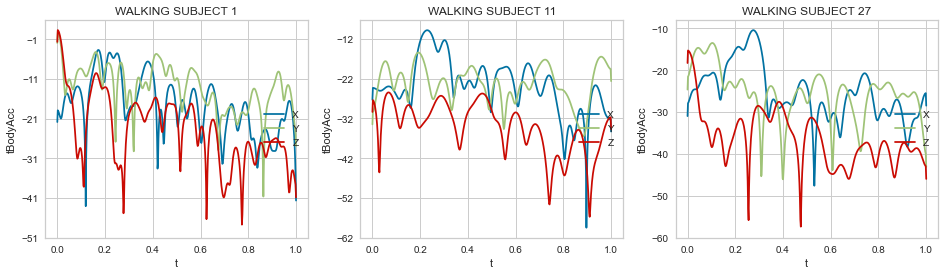

In [296]:
# What about looking at different subjects? How similar does WALKING look from subject to subject?

t_series_walk = hua.loc[(hua['subject'] == 1) & (hua['Activity'] == 'WALKING')]
t_series_stand = hua.loc[(hua['subject'] == 11) & (hua['Activity'] == 'WALKING')]
t_series_walkup = hua.loc[(hua['subject'] == 27) & (hua['Activity'] == 'WALKING')]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

# two signals with a coherent part and a random part
w1 = t_series_walk['angle(tBodyGyroMean,gravityMean)']
w2 = t_series_walk['tGravityAcc-correlation()-X,Y']
w3 = t_series_walk['tBodyGyro-arCoeff()-X,4']

wu1 = t_series_walkup['angle(tBodyGyroMean,gravityMean)']
wu2 = t_series_walkup['tGravityAcc-correlation()-X,Y']
wu3 = t_series_walkup['tBodyGyro-arCoeff()-X,4']

s1 = t_series_stand['angle(tBodyGyroMean,gravityMean)']
s2 = t_series_stand['tGravityAcc-correlation()-X,Y']
s3 = t_series_stand['tBodyGyro-arCoeff()-X,4']


ax1.set_title('WALKING SUBJECT 1')
ax1.psd(w1,pad_to=1024,scale_by_freq=True, label='X')
ax1.psd(w2,pad_to=1024,scale_by_freq=True, label='Y')
ax1.psd(w3,pad_to=1024,scale_by_freq=True, label='Z')
ax1.legend(loc='right')
ax1.set_xlabel('t')
ax1.set_ylabel('tBodyAcc')
ax1.grid(True)

ax2.set_title('WALKING SUBJECT 11')
ax2.psd(s1,pad_to=1024,scale_by_freq=True, label='X')
ax2.psd(s2,pad_to=1024,scale_by_freq=True, label='Y')
ax2.psd(s3,pad_to=1024,scale_by_freq=True, label='Z')
ax2.legend(loc='right')
ax2.set_xlabel('t')
ax2.set_ylabel('tBodyAcc')
ax2.grid(True)

ax3.set_title('WALKING SUBJECT 27')
ax3.psd(wu1,pad_to=1024,scale_by_freq=True, label='X')
ax3.psd(wu2,pad_to=1024,scale_by_freq=True, label='Y')
ax3.psd(wu3,pad_to=1024,scale_by_freq=True, label='Z')
ax3.legend(loc='right')
ax3.set_xlabel('t')
ax3.set_ylabel('tBodyAcc')
ax3.grid(True)

plt.show()
#print (s1)

# NOTE TO SELF: Make functions and loops for this to scale it

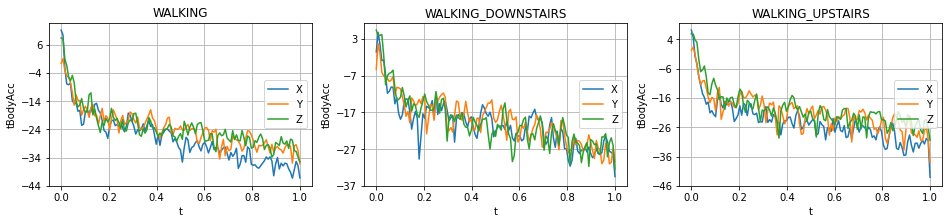

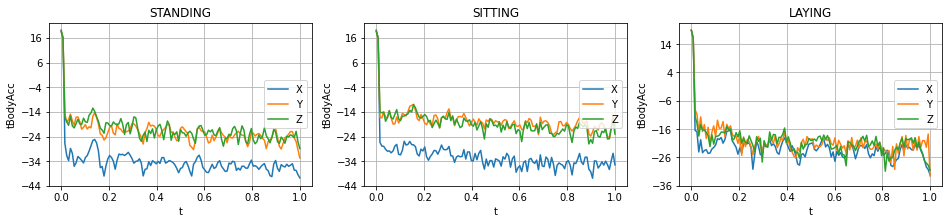

In [418]:
# NOTE TO SELF: Make functions and loops for this to scale it

# Select the subject and the activity
t_series_walk = hua.loc[(hua['Activity'] == 'WALKING')] #
t_series_stand = hua.loc[(hua['Activity'] == 'STANDING')]
t_series_walkup = hua.loc[(hua['Activity'] == 'WALKING_UPSTAIRS')]

t_series_lay = hua.loc[(hua['Activity'] == 'LAYING')]
t_series_sit = hua.loc[(hua['Activity'] == 'SITTING')]
t_series_walkdn = hua.loc[(hua['Activity'] == 'WALKING_DOWNSTAIRS')]


# Pick the signals to plot
w1 = t_series_walk['tBodyAcc-mad()-X']
w2 = t_series_walk['tBodyAcc-mad()-Y']
w3 = t_series_walk['tBodyAcc-mad()-Z']

wu1 = t_series_walkup['tBodyAcc-mad()-X']
wu2 = t_series_walkup['tBodyAcc-mad()-Y']
wu3 = t_series_walkup['tBodyAcc-mad()-Z']

wd1 = t_series_walkdn['tBodyAcc-mad()-X']
wd2 = t_series_walkdn['tBodyAcc-mad()-Y']
wd3 = t_series_walkdn['tBodyAcc-mad()-Z']

s1 = t_series_stand['tBodyAcc-mad()-X']
s2 = t_series_stand['tBodyAcc-mad()-Y']
s3 = t_series_stand['tBodyAcc-mad()-Z']

st1 = t_series_sit['tBodyAcc-mad()-X']
st2 = t_series_sit['tBodyAcc-mad()-Y']
st3 = t_series_sit['tBodyAcc-mad()-Z']

l1 = t_series_lay['tBodyAcc-mad()-X']
l2 = t_series_lay['tBodyAcc-mad()-Y']
l3 = t_series_lay['tBodyAcc-mad()-Z']

# Create the plots

fig, (ax1, ax4, ax3) = plt.subplots(1, 3, figsize=(16, 3))

ax1.set_title('WALKING')
ax1.psd(w1, label='X')
ax1.psd(w2, label='Y')
ax1.psd(w3, label='Z')
ax1.legend(loc='right')
ax1.set_xlabel('t')
ax1.set_ylabel('tBodyAcc')
ax1.grid(True)

ax4.set_title('WALKING_DOWNSTAIRS')
ax4.psd(wd1, label='X')
ax4.psd(wd2, label='Y')
ax4.psd(wd3, label='Z')
ax4.legend(loc='right')
ax4.set_xlabel('t')
ax4.set_ylabel('tBodyAcc')
ax4.grid(True)

ax3.set_title('WALKING_UPSTAIRS')
ax3.psd(wu1, label='X')
ax3.psd(wu2, label='Y')
ax3.psd(wu3, label='Z')
ax3.legend(loc='right')
ax3.set_xlabel('t')
ax3.set_ylabel('tBodyAcc')
ax3.grid(True)

fig, (ax2, ax5, ax6) = plt.subplots(1, 3, figsize=(16, 3))

ax2.set_title('STANDING')
ax2.psd(s1, label='X')
ax2.psd(s2, label='Y')
ax2.psd(s3, label='Z')
ax2.legend(loc='right')
ax2.set_xlabel('t')
ax2.set_ylabel('tBodyAcc')
ax2.grid(True)

ax5.set_title('SITTING')
ax5.psd(st1, label='X')
ax5.psd(st2, label='Y')
ax5.psd(st3, label='Z')
ax5.legend(loc='right')
ax5.set_xlabel('t')
ax5.set_ylabel('tBodyAcc')
ax5.grid(True)

ax6.set_title('LAYING')
ax6.psd(l1, label='X')
ax6.psd(l2, label='Y')
ax6.psd(l3, label='Z')
ax6.legend(loc='right')
ax6.set_xlabel('t')
ax6.set_ylabel('tBodyAcc')
ax6.grid(True)

plt.show()

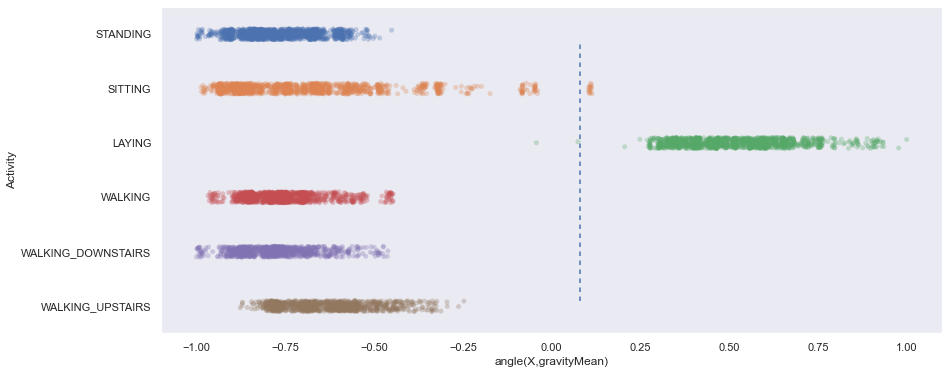

In [264]:
# Angle between X-axis & gravityMean
plt.figure(figsize=(14,6))
sns.stripplot(y='Activity', x='angle(X,gravityMean)', data=hua, orient="h", alpha=.3)
plt.axvline(x=0.08, ymin=0.1, ymax=0.9,dashes=(3,3))


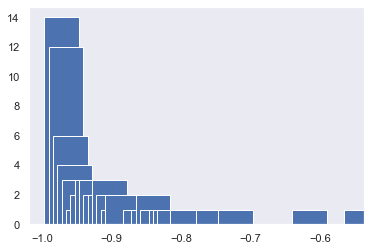

In [279]:
fig, ax = plt.subplots()
ax.hist(s2, bins=70, width=0.05)
plt.show()

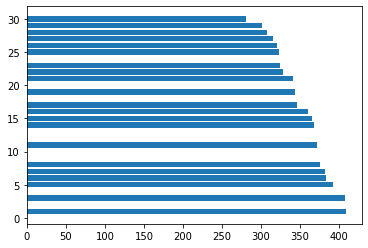

In [293]:
# How evenly distributed are the subjects' activities?
subject_counts = hua.subject.value_counts()

# What's this look like?
fig, ax = plt.subplots()
ax.barh(hua.subject.drop_duplicates(), subject_counts)
plt.show()

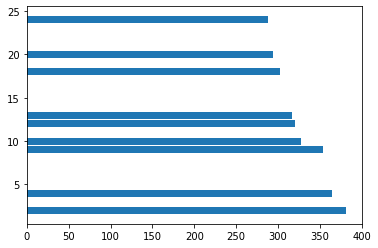

In [294]:
# Not all are there becuase they are likely in the test split.. Let's see
test_subject_counts = hua_test.subject.value_counts()

# What's this look like?
fig, ax = plt.subplots()
ax.barh(hua_test.subject.drop_duplicates(), test_subject_counts)
plt.show()

In [14]:
# What is the duration of each activity? From data description — "fixed-width sliding windows of 2.56 sec and 50% overlap" 
duration = (hua.groupby(['Activity', 'subject']).count().reset_index().groupby('Activity')).mean()
duration

,subject,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,16.809524,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
SITTING,16.809524,61.238095,61.238095,61.238095,61.238095,61.238095,61.238095,61.238095,61.238095,61.238095,...,61.238095,61.238095,61.238095,61.238095,61.238095,61.238095,61.238095,61.238095,61.238095,61.238095
STANDING,16.809524,65.428571,65.428571,65.428571,65.428571,65.428571,65.428571,65.428571,65.428571,65.428571,...,65.428571,65.428571,65.428571,65.428571,65.428571,65.428571,65.428571,65.428571,65.428571,65.428571
WALKING,16.809524,58.380952,58.380952,58.380952,58.380952,58.380952,58.380952,58.380952,58.380952,58.380952,...,58.380952,58.380952,58.380952,58.380952,58.380952,58.380952,58.380952,58.380952,58.380952,58.380952
WALKING_DOWNSTAIRS,16.809524,46.952381,46.952381,46.952381,46.952381,46.952381,46.952381,46.952381,46.952381,46.952381,...,46.952381,46.952381,46.952381,46.952381,46.952381,46.952381,46.952381,46.952381,46.952381,46.952381
WALKING_UPSTAIRS,16.809524,51.095238,51.095238,51.095238,51.095238,51.095238,51.095238,51.095238,51.095238,51.095238,...,51.095238,51.095238,51.095238,51.095238,51.095238,51.095238,51.095238,51.095238,51.095238,51.095238


In [102]:
hua_labels

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [ ]:
sns.heatmap(data=hua_test,vmin=0.7)
plt.show()

In [ ]:
# What correlations exist between different features 
feature_cols = hua.columns.drop(['subject'])  

corr_values = []

# Calculate the correlation values:
corr_values = hua[feature_cols].corr()

# Convert to a dataframe:
corr_values = (corr_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlation'}))

# Get Absolute Correlation
corr_values['Abs_Corr'] = corr_values.Correlation.abs()

# Filter out btween 1.0 and 0.8
corr_values[(corr_values.Correlation < 1.0) & (corr_values.Correlation > 0.9)].sort_values('Abs_Corr', ascending=False)

314721

In [123]:
import warnings  # This was a sweet find :)
warnings.filterwarnings('ignore')

# Baseline - Compare model accuracy using all features across classifiers 
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    LogisticRegression()
    ]

# Naive Train Accuracy
algorithm = []
scores = []
for model in models:
    algorithm.append(model.__class__.__name__)
    scores.append(cross_val_score(model,hua_tr,hua_labels, cv=5).mean())
warnings.filterwarnings('ignore')
Naivescore_Train = pd.DataFrame({'Algorithm': algorithm, 'Cross Val Score': scores}).set_index('Algorithm')


# Naive Test Accuracy
algorithm = []
scores = []
for model in models:
    model = model.fit(hua_tr, hua_labels)
    y_pred = model.predict(hua_ts)
    algorithm.append(model.__class__.__name__)
    scores.append(accuracy_score(y_pred, hua_ts_labels))
warnings.filterwarnings('ignore')
Naivescore_Test = pd.DataFrame({'Algorithm': algorithm, 'Test Accuracy': scores})

In [143]:
Naivescore_Train.head()

,Cross Val Score
Algorithm,
DecisionTreeClassifier,0.841142
RandomForestClassifier,0.917306
KNeighborsClassifier,0.897175
LogisticRegression,0.933495


In [146]:
Naivescore_Test.head()

,Test Accuracy
Algorithm,
DecisionTreeClassifier,0.854428
RandomForestClassifier,0.925687
KNeighborsClassifier,0.900238
LogisticRegression,0.957923


In [267]:
new_df = Naivescore_Test.merge(Naivescore_Train, on='Algorithm')
new_df

,Test Accuracy,Cross Val Score
Algorithm,,
DecisionTreeClassifier,0.854428,0.841142
RandomForestClassifier,0.925687,0.917306
KNeighborsClassifier,0.900238,0.897175
LogisticRegression,0.957923,0.933495


<Figure size 648x432 with 0 Axes>

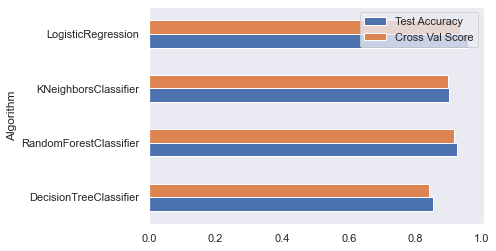

In [161]:
# Bar plot this
fig = plt.figure(figsize=(9,6)) 

new_df.plot(kind='barh')

plt.show()

In [158]:
print (Naivescore_Train)

                        Cross Val Score
Algorithm                              
DecisionTreeClassifier         0.841142
RandomForestClassifier         0.917306
KNeighborsClassifier           0.897175
LogisticRegression             0.933495


<a id="partii"></a>
# t-SNE - This may be another dimensionality reduction possibilty

* More info here: https://www.datacamp.com/community/tutorials/introduction-t-sne
* Let's give this a go.. yes I had to cut-and-paste code to make this work!
* Slightly above my pay-grade in terms of explaiing how this works, 
* BUT it helps to have a visualization of the different `Activities`

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.216s...
[t-SNE] Computed neighbors for 7352 samples in 28.848s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125481
[t-SNE] KL divergence after 1000 iterations: 1.282857


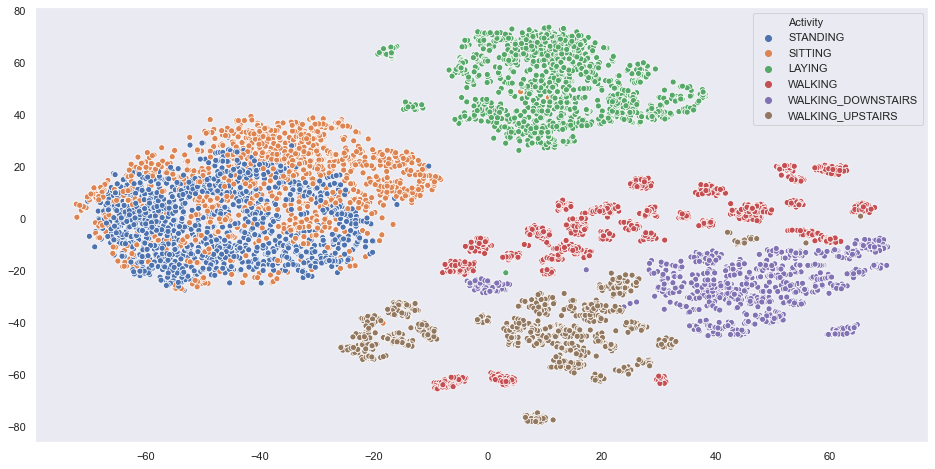

In [18]:
from sklearn.manifold import TSNE
X_tsne = hua.drop(['subject', 'Activity'], axis=1)
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_tsne)
plt.figure(figsize=(16,8))
sns.set(style="dark")
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=hua['Activity'])

<a id="partiii"></a>
# PCA to reduce number of features ?
* Let's see if this works...
* 

In [313]:
# PCA to check for optimal number of features ..?
hua_pca = hua_tr

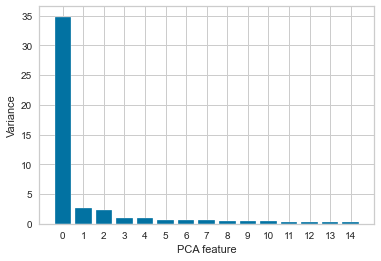

In [314]:
pca = PCA(random_state=61)
pca.fit(hua_pca)
features = range(pca.n_components_)
#plt.figure(figuresize=16,8)
plt.bar(features[:15], pca.explained_variance_[:15])
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

### This suggests that I could just use the top 5 to 6 PCA features. 
* I assume I will need to prove this...

* Try the first three PCA - 
* What about adding an penalty for Logistic Regression?
* What do these PCA tell you about the activities?

In [508]:
pc1 = pca.components_[20]

# Quick view
pd.Series(pc1, index=hua_pca.columns).sort_values(ascending=False).head(15)

angle(tBodyGyroJerkMean,gravityMean)    0.479798
tBodyAccJerk-mean()-X                   0.201355
tGravityAcc-energy()-Y                  0.115365
fBodyAcc-kurtosis()-Z                   0.098975
fBodyAcc-skewness()-Z                   0.098076
tGravityAcc-correlation()-X,Y           0.085849
angle(tBodyGyroMean,gravityMean)        0.075399
angle(Z,gravityMean)                    0.074471
tGravityAcc-min()-Y                     0.059661
tGravityAcc-mean()-Y                    0.055262
fBodyAcc-maxInds-Y                      0.054807
tGravityAcc-arCoeff()-Z,4               0.051200
tGravityAcc-arCoeff()-Z,2               0.051194
tGravityAcc-max()-Y                     0.048378
tBodyGyroMag-arCoeff()4                 0.045369
dtype: float64

In [530]:
data = pd.DataFrame({'Value':hua_pca.columns, 'Signal': pd.Series(pc1, index=hua_pca.columns).sort_values(ascending=False)}) 
data.head(20)

,Value,Signal
"angle(tBodyGyroJerkMean,gravityMean)",tBodyAcc-mean()-X,0.479798
tBodyAccJerk-mean()-X,tBodyAcc-mean()-Y,0.201355
tGravityAcc-energy()-Y,tBodyAcc-mean()-Z,0.115365
fBodyAcc-kurtosis()-Z,tBodyAcc-std()-X,0.098975
fBodyAcc-skewness()-Z,tBodyAcc-std()-Y,0.098076
"tGravityAcc-correlation()-X,Y",tBodyAcc-std()-Z,0.085849
"angle(tBodyGyroMean,gravityMean)",tBodyAcc-mad()-X,0.075399
"angle(Z,gravityMean)",tBodyAcc-mad()-Y,0.074471
tGravityAcc-min()-Y,tBodyAcc-mad()-Z,0.059661
tGravityAcc-mean()-Y,tBodyAcc-max()-X,0.055262


In [317]:
hua_pcs = pca.transform(hua_pca)
hua_pcs = pd.DataFrame(hua_pcs, 
                        columns=['PC'+str(i) for i in range(1, hua_pcs.shape[1]+1)])

hua_pcs['Activity'] = hua.Activity
hua_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC553,PC554,PC555,PC556,PC557,PC558,PC559,PC560,PC561,Activity
0,-5.520280,-0.290278,-1.529929,1.333242,1.425089,-0.194708,0.577454,0.691490,-1.222865,-0.363414,...,-2.848148e-17,1.519881e-16,7.751340e-17,-7.481224e-17,1.395403e-15,-4.197684e-16,2.268621e-16,-5.416576e-17,-4.446489e-17,STANDING
1,-5.535350,-0.082530,-1.924804,0.671273,0.671260,0.735144,-0.616908,-0.771714,-0.615496,-0.895525,...,4.334840e-18,7.193948e-17,-3.517582e-17,-7.904166e-17,-4.844151e-16,1.566909e-17,1.276150e-16,5.378193e-17,1.681646e-17,STANDING
2,-5.474988,0.287387,-2.144642,0.531806,0.207824,-0.037772,0.057628,0.093917,-0.063147,-0.216898,...,-4.074556e-17,-5.346720e-17,-3.469026e-17,3.192660e-18,1.115662e-15,-5.960228e-17,1.237834e-16,8.451033e-17,7.331552e-18,STANDING
3,-5.677232,0.897031,-2.018220,0.157125,0.759085,1.079547,-0.267805,-0.731391,0.281296,0.466269,...,-3.497156e-17,8.518997e-17,-8.313577e-17,4.659485e-17,-1.322241e-16,-8.740072e-17,7.822283e-17,7.301704e-17,2.913641e-18,STANDING
4,-5.748749,1.162952,-2.139533,0.207823,0.473090,0.463035,-0.152227,-0.107509,0.289819,0.539206,...,-1.333676e-17,1.477796e-17,-8.426281e-17,-1.936732e-17,-2.331246e-16,-9.880062e-17,2.053530e-17,4.665858e-17,4.760992e-17,STANDING


In [141]:
exp_var = pca.explained_variance_ratio_
exp_var[1:]

array([4.91302272e-02, 4.12146745e-02, 1.87495612e-02, 1.69485999e-02,
       1.27206929e-02, 1.17668514e-02, 1.06897316e-02, 9.69379779e-03,
       8.58018171e-03, 7.62301911e-03, 6.72445661e-03, 5.79419596e-03,
       5.57880638e-03, 4.98925730e-03, 4.74937626e-03, 4.67200109e-03,
       4.31617860e-03, 4.25715180e-03, 4.10395039e-03, 3.94002401e-03,
       3.75309316e-03, 3.52427488e-03, 3.39359425e-03, 3.32138998e-03,
       3.19428786e-03, 3.01779149e-03, 2.91782575e-03, 2.89569956e-03,
       2.81927795e-03, 2.76704148e-03, 2.63395052e-03, 2.55306687e-03,
       2.35865883e-03, 2.30652304e-03, 2.23648168e-03, 2.22948133e-03,
       2.10275984e-03, 2.08392917e-03, 2.04773752e-03, 1.92856457e-03,
       1.88879623e-03, 1.81180259e-03, 1.79472696e-03, 1.72327672e-03,
       1.60201939e-03, 1.57039496e-03, 1.56627367e-03, 1.52969849e-03,
       1.50351278e-03, 1.45117716e-03, 1.40640152e-03, 1.36825069e-03,
       1.26857902e-03, 1.25006115e-03, 1.19742181e-03, 1.18119807e-03,
      

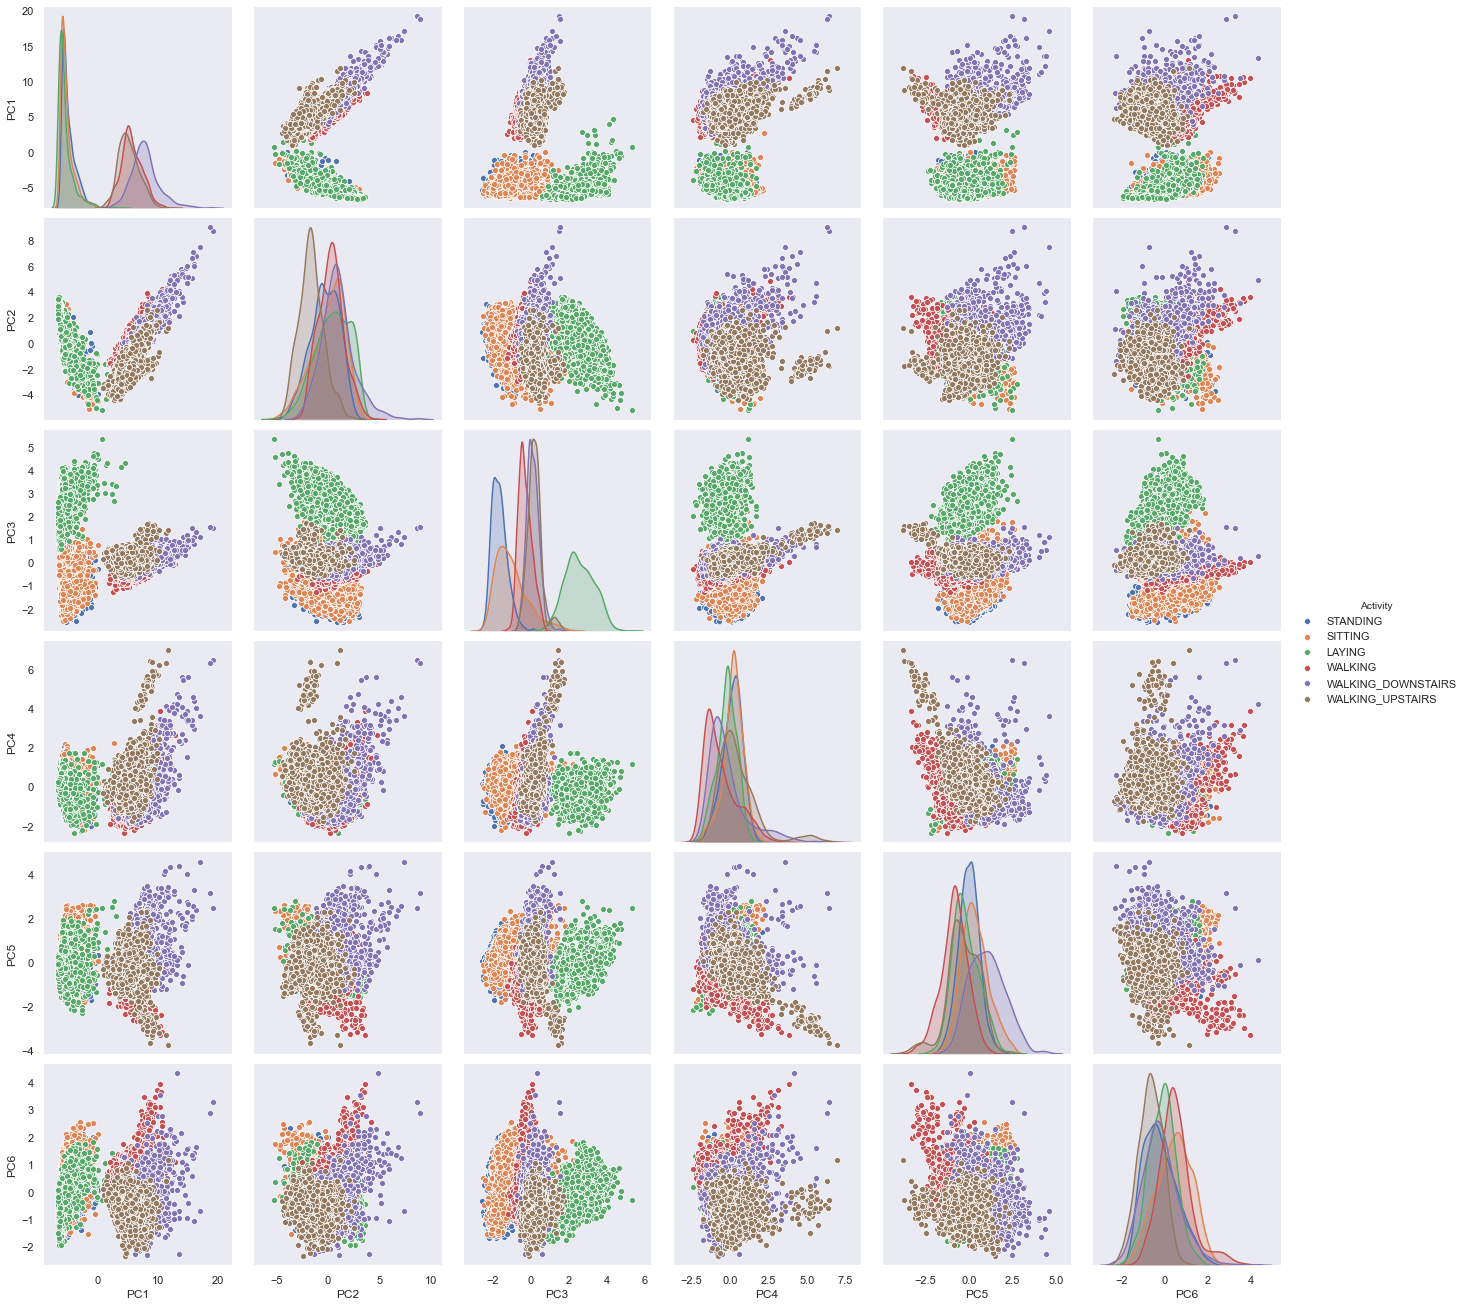

In [184]:
sns.pairplot(data=hua_pcs, vars=['PC1','PC2','PC3','PC4','PC5','PC6'], hue='Activity', height=3);

In [ ]:
# PCA
pca = PCA(n_components = 150)
pca_traindata = pca.fit(hua_tr)
pca_traindata.explained_variance_
pca_traindata.n_components_
pcatrain = pca_traindata.transform(hua_tr)
pcatest = pca_traindata.transform(hua_ts)
cum_ratio = (np.cumsum(pca_traindata.explained_variance_ratio_))

In [ ]:
# Visualize PCA analysis
plt.plot(np.cumsum(pca_traindata.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# Plot a confusion matrix
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) 

In [ ]:
import scikitplot as skplt

skplt.decomposition.plot_pca_2d_projection(pca, hua_tr, hua_labels, figsize=(14,6))

array([[-5.52028030e+00, -2.90277517e-01, -1.52992855e+00, ...,
         5.22595828e-01,  5.31742171e-01, -2.23615481e-01],
       [-5.53534954e+00, -8.25302495e-02, -1.92480428e+00, ...,
         1.69681612e-01,  4.26339677e-02,  3.80195245e-01],
       [-5.47498801e+00,  2.87387051e-01, -2.14464160e+00, ...,
         5.56923147e-01,  1.55530703e-01,  3.31975137e-01],
       ...,
       [ 5.85750527e+00, -3.08184349e+00,  6.71207302e-01, ...,
        -6.00484508e-03,  1.16753238e+00,  8.96077367e-02],
       [ 5.42109482e+00, -3.42643018e+00,  6.71243268e-01, ...,
        -9.48602557e-02,  1.58237838e-01, -9.19386223e-01],
       [ 5.49797027e+00, -2.78992873e+00,  5.72224011e-03, ...,
        -2.77226127e-01,  2.59706861e-01, -5.71733377e-01]])

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, wine_cont.shape[1]+1), hua_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, wine_cont.shape[1]+1), hua_pca.explained_variance_ratio_, s=100)
ax.set_title('wine data: explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

<a id="partiv"></a>
# Modeling / Model Selection

### Logistic Regression on PCA Components

In [419]:
pca_cols = []
for i in range (1, 120):
    pca_cols.append('PC' + str(i))

feature_cols = pca_cols

X = hua_pcs[feature_cols]
y = hua_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

# instantiate classifier
lr = LogisticRegression()
# fit classifier
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [420]:
# Check Accuracy
y_pred = lr.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred)))

0.9864038069340585


In [425]:
# Function for confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(16,8)) 
    im = ax.imshow(cm, interpolation='nearest', cmap="PuRd")
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True',
    xlabel='Predicted')
    plt.xticks()
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

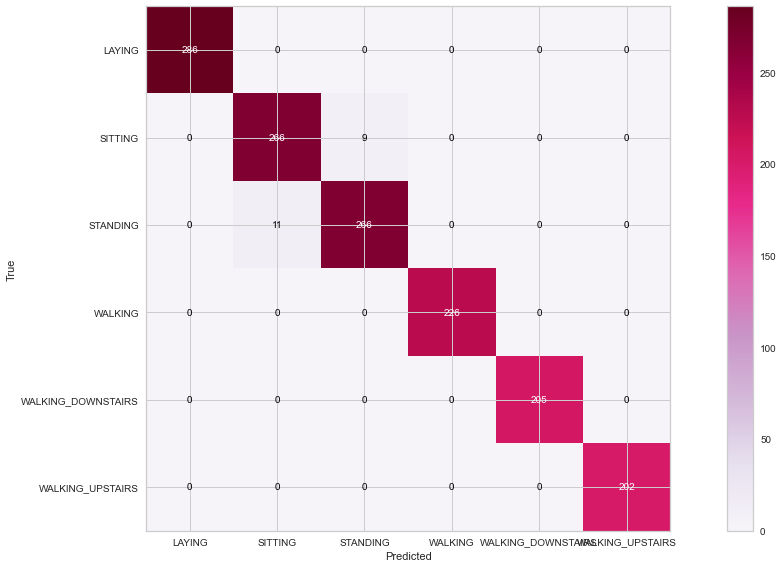

In [426]:
# Plot confusion matrix
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))  

In [427]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, yhat_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is male', fontsize=18)
plt.legend(loc="lower right")
plt.show()

NameError: name 'yhat_pp' is not defined

In [391]:
#Random Forest
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [393]:


rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)



Accuracy using Random forest :  0.9462950373895309


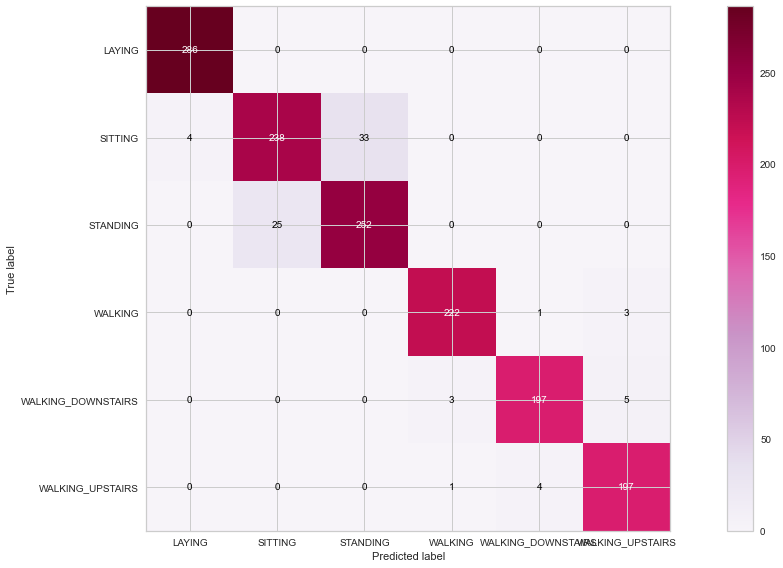

In [395]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

_______


In [396]:
# What if we scaled it? 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [399]:
# instantiate classifier
lr = LogisticRegression()
# fit classifier
lr.fit(Xs,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [400]:
# Check Accuracy
y_pred = lr.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred)))

0.91162474507138


In [402]:
# using a 25-fold cross-val for fun
scores = cross_val_score(lr, Xs, y, cv=25)
print (scores)
print (np.mean(scores))

[0.97627119 0.98983051 0.91156463 0.93197279 0.9047619  0.96938776
 0.97278912 0.98639456 0.97619048 0.8707483  0.93197279 0.91156463
 0.97278912 0.93537415 0.97278912 0.98979592 0.97959184 0.95238095
 0.97619048 0.99659864 0.97959184 0.96938776 0.93197279 0.99319728
 0.98979592]
0.9589161766401475


In [403]:
from sklearn.linear_model import LogisticRegressionCV

In [405]:
lr_ridge = LogisticRegressionCV(penalty='l2', Cs=200, cv=25)
lr_ridge.fit(X_train, y_train)

LogisticRegressionCV(Cs=200, class_weight=None, cv=25, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [406]:
print (lr_ridge.C_)
yhat_ridge = lr_ridge.predict(X_test)
yhat_ridge_pp = lr_ridge.predict_proba(X_test)

[4.60592204 4.60592204 4.60592204 4.60592204 4.60592204 4.60592204]


In [429]:
lr_lasso = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=100, cv=10)
lr_lasso.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [430]:
yhat_lasso = lr_lasso.predict(X_test)
yhat_lasso_pp = lr_lasso.predict_proba(X_test)

In [ ]:
# PLOT ROC?


In [435]:
coefs_vars = pd.DataFrame({
        'coef':lr_lasso.coef_[0],
        'variable':X.columns,
        'abscoef':np.abs(lr_lasso.coef_[0])
    })
coefs_vars.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars.head(20)


,coef,variable,abscoef
2,6.015424,PC3,6.015424
21,3.503071,PC22,3.503071
47,2.330216,PC48,2.330216
31,1.976726,PC32,1.976726
25,-1.844982,PC26,1.844982
22,1.678715,PC23,1.678715
44,1.291059,PC45,1.291059
12,1.269009,PC13,1.269009
5,-1.153241,PC6,1.153241
23,1.136382,PC24,1.136382


In [462]:
new_feature_cols = coefs_vars.variable[:100]
new_feature_cols

2      PC3
21    PC22
47    PC48
31    PC32
25    PC26
      ... 
43    PC44
46    PC47
71    PC72
48    PC49
70    PC71
Name: variable, Length: 100, dtype: object

In [463]:
X = hua_pcs[new_feature_cols]
y = hua_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

# instantiate classifier
lr = LogisticRegression()
# fit classifier
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [464]:
# Check Accuracy
y_pred = lr.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred)))

0.9796057104010877


In [486]:

pca_scores = pd.DataFrame(columns=['Num_Vars', 'Score'])

for j in range (1, 200):
    new_feature_cols = coefs_vars.variable[:j]
    X = hua_pcs[new_feature_cols]
    y = hua_labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)
    # Instantiate classifier
    lr = LogisticRegression()
    # Fit classifier
    lr.fit(X,y)
    # Check Accuracy
    y_pred = lr.predict(X_test)
    #print (j)
    #print (metrics.accuracy_score(y_test, y_pred))
    pca_scores = pca_scores.append(pd.DataFrame({'Num_Vars': [j], 'Score': metrics.accuracy_score(y_test, y_pred)}), ignore_index=True)

In [487]:
pca_scores

,Num_Vars,Score
0,1,0.566281
1,2,0.593474
2,3,0.602311
3,4,0.611829
4,5,0.609789
...,...,...
194,195,0.986404
195,196,0.986404
196,197,0.986404
197,198,0.986404


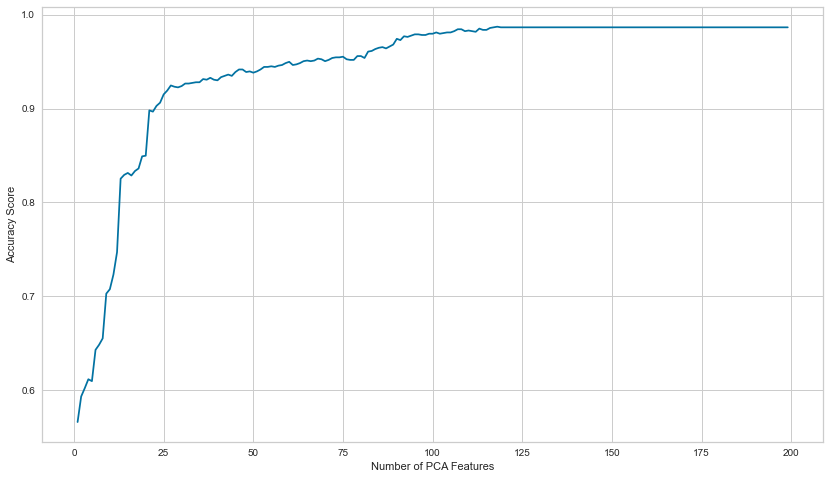

In [505]:
fig = plt.gcf()
fig.set_size_inches(14, 8)
ax = sns.lineplot(x="Num_Vars", y="Score", data=pca_scores, markers=True, dashes=False)
ax.set(xlabel='Number of PCA Features', ylabel='Accuracy Score')
plt.show()

NameError: name 'wine_cont' is not defined

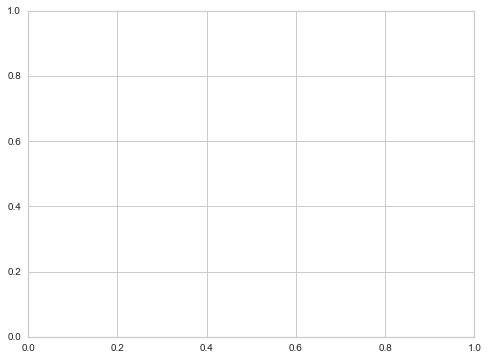

In [531]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, wine_cont.shape[1]+1), hua_pca.explained_variance_, lw=2)
ax.scatter(range(1, wine_cont.shape[1]+1), hua_pca.explained_variance_, s=50)

ax.plot(range(1, len(wine_pa)+1), wine_pa, lw=2, color='darkred')
ax.scatter(range(1, len(wine_pa)+1), wine_pa, s=40, color='darkred')


ax.set_title("Horns parallel analysis on heptathlon principal components")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Eigenvalue")
plt.show()